In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
my_data = load_boston()

In [3]:
print(my_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
features = pd.DataFrame(my_data.data, columns=my_data.feature_names)
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
target = pd.DataFrame(my_data.target, columns=['Target'])
target.head()

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
#The baseline model using mean of the target

In [7]:
mean_output = target['Target'].mean()
mean_output

22.532806324110698

In [8]:
#Sum squared Error
squared_error = pd.Series(mean_output-target['Target'])**2
print(squared_error)

0        2.152657
1        0.870128
2      148.040602
3      118.095898
4      186.792183
          ...    
501      0.017638
502      3.735740
503      1.869219
504      0.283883
505    113.056570
Name: Target, Length: 506, dtype: float64


In [9]:
sum_squared_error = np.sum(squared_error)
print(sum_squared_error)

42716.29541501976


<AxesSubplot:ylabel='Frequency'>

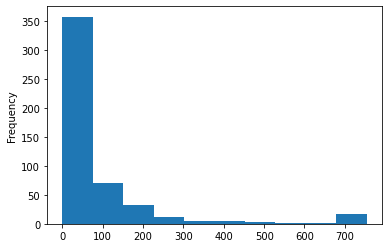

In [10]:
squared_error.plot(kind = 'hist')

In [12]:
ad_df=pd.read_csv('Advertising.csv')
ad_df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [11]:
## Using the Least Square method

In [13]:
X = ad_df[['TV']]
y = ad_df[['sales']]

In [14]:
print(X.shape, y.shape)

(200, 1) (200, 1)


In [15]:
X = sm.add_constant(X)

In [16]:
X.head()

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [17]:
linear_regression = sm.OLS(y,X)

In [18]:
#Estimation of coefficients
model = linear_regression.fit()

In [20]:
#In case if you want to use smf
# linear_regression = smf.ols(formula='target ~ RM', data=data)
# model = linear_regression.fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           1.47e-42
Time:                        03:06:59   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Let us compare the results

In [22]:
predicted_values = model.predict(X)

In [23]:
SSE_on_mean = np.sum((target['Target'] - target['Target'].mean())**2)
SSE_on_OLS = np.sum((target['Target'] - predicted_values)**2)

In [24]:
print('Error using Mean : ',SSE_on_mean)
print('Error using OLS : ', SSE_on_OLS)

Error using Mean :  42716.29541501976
Error using OLS :  22061.879196211798


In [26]:
# Guess this is what ???
(SSE_on_mean-SSE_on_OLS)/SSE_on_mean

0.4835254559913341

#### TASK

Use the Advertising.csv shared yesterday in your drive to build two different OLS models. One using TV as features or input and sales as target and the other model using Radio as features and sales as target and compare their R squared values

